In [6]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
import seaborn as sns


In [7]:
english_df=pd.read_csv("tweet_emotions.csv")
english_df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


*Showing data info*

In [8]:
english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


Showing number of null values in each column of the data

In [9]:
english_df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

Showing counts of the sentiment different values

In [10]:
english_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

visualizing counts of the sentiment's  different values

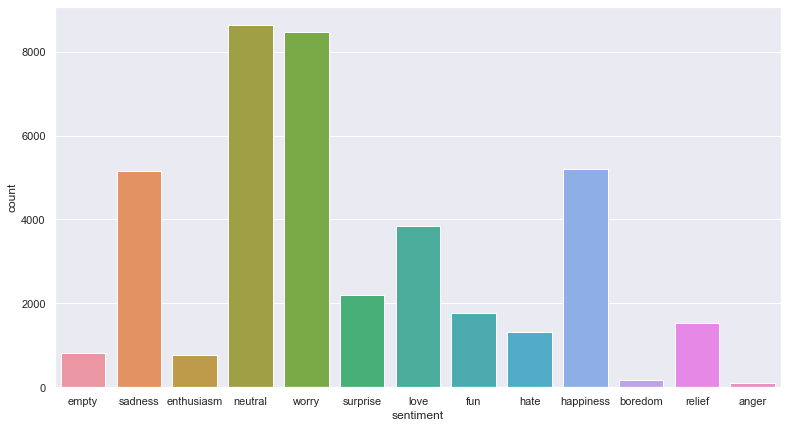

In [11]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(13,7)})
ax = sns.countplot(x="sentiment", data=english_df)

Classifying sentiments into 2 groups of feelings( positive, negative)

In [12]:
english_df['sentiment']= english_df['sentiment'].replace(dict.fromkeys(['worry','sadness','hate','empty','boredom','anger'], 'Negative'))
english_df['sentiment']= english_df['sentiment'].replace(dict.fromkeys(['happiness','love','fun','enthusiasm','surprise','neutral','relief'], 'Positive'))
english_df['sentiment'].value_counts()


Positive    23937
Negative    16063
Name: sentiment, dtype: int64

Visualizing counts of the sentiment's different values after dividing them into positive and negative

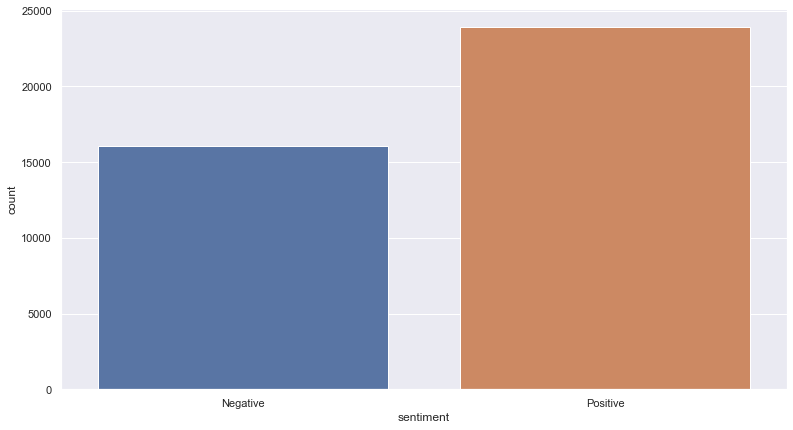

In [13]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(13,7)})
ax = sns.countplot(x="sentiment", data=english_df)

Removing irrelevant characters and links , then converting all the content into lower case

In [14]:
english_df['content']=english_df['content'].str.replace('[^A-Za-z0-9\s]+', '')
english_df['content']=english_df['content'].str.replace('http\S+|www.\S+', '', case=False)
english_df['content']=english_df['content'].str.lower()
target=english_df.sentiment
english_df = english_df.drop(['sentiment'],axis=1)
le=LabelEncoder()
target=le.fit_transform(target)

Splitting the data into train set and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(english_df,target,stratify=target,test_size=0.2, random_state=42)

Using TF-IDF vectorizer to convert a collection of raw documents to a matrix of TF-IDF features.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train.content)
X_test_counts =vectorizer.transform(X_test.content)

Using Random forest classifier to classify the content 

In [18]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

clf = RandomForestClassifier(n_estimators=150).fit(X_train_counts,y_train)
predicted = clf.predict(X_test_counts)
nb_clf_accuracy = np.mean(predicted == y_test) * 100
print(nb_clf_accuracy)

71.05
